En glow, la corriente del circuito se da por

$$ V_p = -R I+ V_s $$

Con $V_p$ La caida de voltaje en el tubo, y V_s el voltaje de la fuente. $V_p$ vs $I$ sera fuertemente no lineal.

Recordar que $V_p = I R_p$


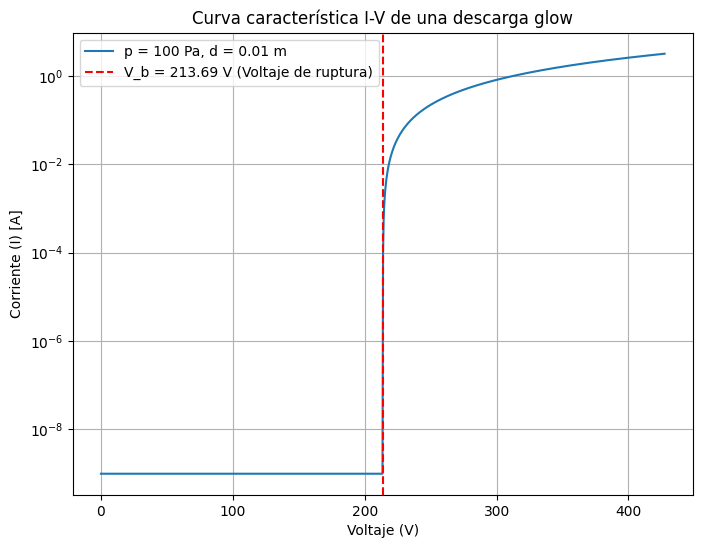

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de entrada
d = 0.01  # distancia entre el ánodo y el cátodo (m)
p = 100  # presión (Pa)
A = 15  # coeficiente de ajuste para el voltaje de ruptura
B = 365  # coeficiente de ajuste para el voltaje de ruptura

# Ley de Paschen: voltaje de ruptura
def paschen_law(p, d):
    return B * p * d / (np.log(A * p * d) - 1)

# Voltaje de ruptura en función de la presión y distancia
V_b = paschen_law(p, d)

# Modelo empírico para la corriente en función del voltaje
def current_vs_voltage(V, V_b):
    I = np.zeros_like(V)
    for i, v in enumerate(V):
        if v < V_b:
            I[i] = 1e-9  # corriente pequeña antes del voltaje de ruptura
        else:
            # Modelo no lineal de la descarga glow (ajuste empírico)
            I[i] = 1e-3 * (v - V_b)**1.5  # corriente no lineal
    return I

# Rango de voltajes para la simulación
V = np.linspace(0, 2*V_b, 1000)

# Calcular la corriente
I = current_vs_voltage(V, V_b)

# Graficar la curva I-V
plt.figure(figsize=(8,6))
plt.plot(V, I, label=f'p = {p} Pa, d = {d} m')
plt.axvline(V_b, color='r', linestyle='--', label=f'V_b = {V_b:.2f} V (Voltaje de ruptura)')
plt.xlabel('Voltaje (V)')
plt.ylabel('Corriente (I) [A]')
plt.title('Curva característica I-V de una descarga glow')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()


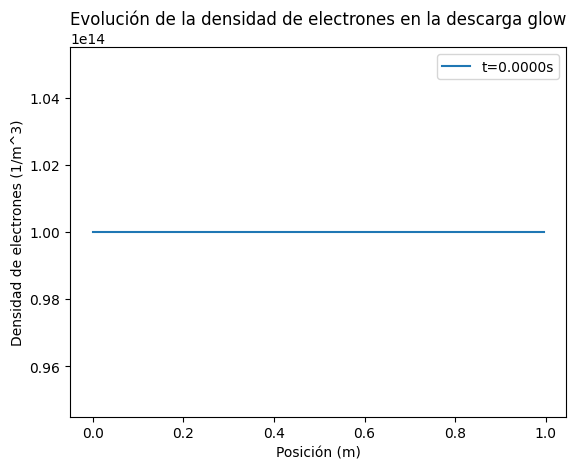

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
L = 1.0  # longitud del sistema (m)
dx = 0.005  # paso espacial (m)
dt = 0.0001  # paso temporal (s)
t_max = 0.01  # tiempo máximo de la simulación (s)
x = np.arange(0, L, dx)
n_steps = int(t_max / dt)

# Parámetros físicos
epsilon_0 = 8.85e-12  # permitividad del vacío (F/m)
q = 1.6e-19  # carga del electrón (C)
mu_e = 0.1  # movilidad de los electrones (m^2/V/s)
D_e = 0.01  # coeficiente de difusión de electrones (m^2/s)
E_ext = 1000  # campo eléctrico externo aplicado (V/m)

# Inicialización de densidades y campo eléctrico
n_e = np.ones_like(x) * 1e14  # densidad inicial de electrones (1/m^3)
n_i = np.ones_like(x) * 1e14  # densidad inicial de iones (1/m^3)
phi = np.zeros_like(x)  # potencial eléctrico inicial
E = np.zeros_like(x)  # campo eléctrico inicial

# Función para calcular la corriente de electrones
def electron_current(n_e, E):
    return -q * mu_e * n_e * E + D_e * np.gradient(n_e, dx)

# Función para resolver la ecuación de Poisson
def solve_poisson(rho):
    d2phi_dx2 = np.gradient(np.gradient(phi, dx), dx)
    phi_new = phi - dt * (d2phi_dx2 + rho / epsilon_0)
    return phi_new

# Simulación
for step in range(n_steps):
    # Calcular densidad de carga
    rho = q * (n_i - n_e)

    # Resolver la ecuación de Poisson para obtener el potencial y el campo eléctrico
    phi = solve_poisson(rho)
    E = -np.gradient(phi, dx)

    # Calcular corriente de electrones
    J_e = electron_current(n_e, E)

    # Actualizar la densidad de electrones
    dn_e_dt = -np.gradient(J_e, dx)
    n_e += dn_e_dt * dt

    # Visualización periódica
    if step % 100 == 0:
        plt.plot(x, n_e, label=f't={step*dt:.4f}s')

# Graficar resultado final
plt.xlabel('Posición (m)')
plt.ylabel('Densidad de electrones (1/m^3)')
plt.title('Evolución de la densidad de electrones en la descarga glow')
plt.legend()
plt.show()

